In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-data-engineered/stroke_data_engineered.csv
/kaggle/input/stroke-data-engineered/stroke_data_engineered_2.csv
/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Models to test:

* Logistic regression
* Regression Models with manually set threshold
    * Linear Regression
    * Ridge regression
    * Lasso Regression
    * ElasticNet Regression

In [3]:
stroke_data = pd.read_csv("../input/stroke-data-engineered/stroke_data_engineered_2.csv")

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


# Split data in half, one training set, and one test set
X_train, X_test, y_train, y_test = train_test_split(stroke_data.drop(columns=["id", "stroke"]),
                                                    stroke_data['stroke'], 
                                                    test_size=0.5, 
                                                    random_state=125)

# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

##### Hyperparameter Optimisation

In [6]:
# model = LogisticRegression(max_iter=200)

# param_grid = {"solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#               "penalty" : ['l1','l2','elasticnet', 'none'], 
#               "C" : [100, 10, 1.0, 0.1, 0.01] }

# # grid = GridSearchCV(model, param_grid, scoring='recall', cv=10)
# grid = RandomizedSearchCV(model, param_grid, scoring='recall', cv=10)


In [16]:
# %%time
# grid.fit(X_train, y_train)

In [8]:
# grid.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}

**Best parameters:** {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}

In [18]:
log_model = LogisticRegression(max_iter=200, solver='lbfgs', penalty='l2', C=1.0)

log_model.fit(X_train, y_train)

log_predict = log_model.predict(X_test)

In [19]:
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2428
           1       0.15      0.02      0.03       127

    accuracy                           0.95      2555
   macro avg       0.55      0.51      0.50      2555
weighted avg       0.91      0.95      0.93      2555



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Prediction')

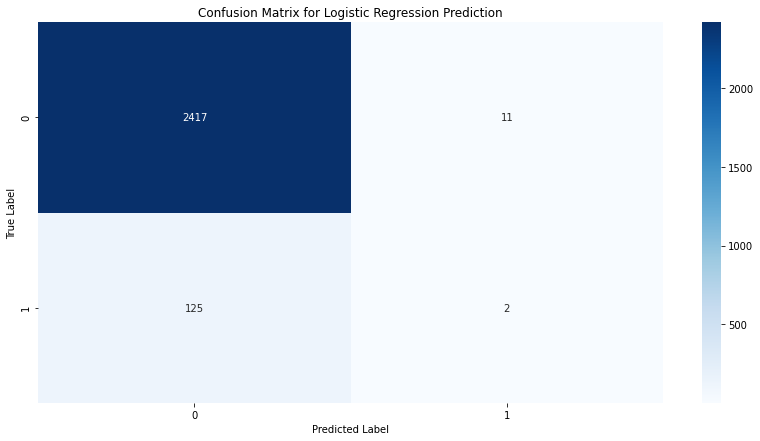

In [20]:
log_conf_matrix = confusion_matrix(y_test, log_predict)

plt.figure(figsize=(14,7))
sns.heatmap(log_conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression Prediction")

# Linear Regression

### Create function which converts regression output to classes with use of a threshold

In [21]:
def regression_output_converter(reg_predictions, threshold=0.1):
    # Converts predictions above threshold to 1
    # zero otherwise

    predictions = []
    for pred in reg_predictions.tolist():
        if pred > threshold:
            predictions.append(1)
        else:
            predictions.append(0)

    predictions = np.array(predictions)
    
    return predictions

### Start training linear regression model

Note: No hyperparamter tuning needed

In [22]:
from sklearn.linear_model import LinearRegression

In [35]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

lin_predict = linear_model.predict(X_test)

LinearRegression()

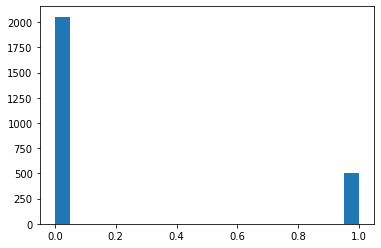

In [36]:
plt.hist(lin_predict, bins=20)
plt.show()

In [32]:
# choose threshold of 0.1
lin_predict = regression_output_converter(lin_predict, threshold=0.1)

In [33]:
print(classification_report(y_test, lin_predict))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2428
           1       0.16      0.63      0.25       127

    accuracy                           0.82      2555
   macro avg       0.57      0.73      0.58      2555
weighted avg       0.94      0.82      0.86      2555



Text(0.5, 1.0, 'Confusion Matrix for Linear Regression Prediction')

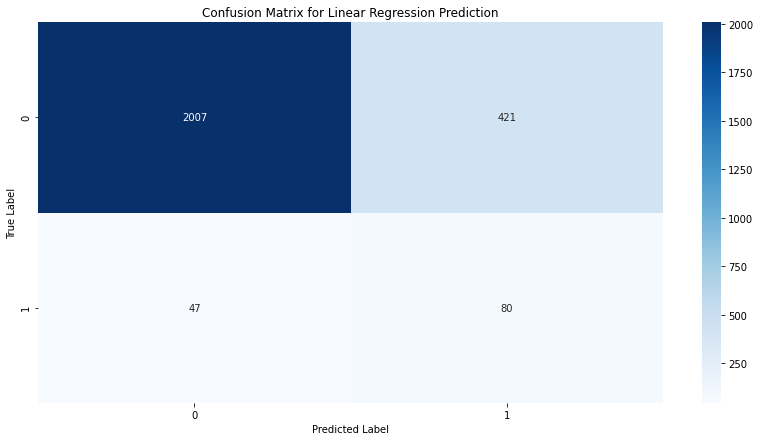

In [34]:
lin_conf_matrix = confusion_matrix(y_test, lin_predict)

plt.figure(figsize=(14,7))
sns.heatmap(lin_conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Linear Regression Prediction")

# Ridge Regression

In [37]:
from sklearn.linear_model import Ridge

##### Hyperparameter Optimization

In [46]:
model = Ridge()

param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100], 
              "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 
             }

# grid = RandomizedSearchCV(model, param_grid, scoring='neg_mean_squared_log_error' , cv=10)
grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_log_error' , cv=10)

In [49]:
# %%time
# grid.fit(X_train, y_train)

In [48]:
# grid.best_params_

{'alpha': 0.0001, 'solver': 'svd'}

**Best parameters:** {'solver': 'sag', 'alpha': 0.0001} (random search)

{'alpha': 0.0001, 'solver': 'svd'} (grid search)

In [50]:
ridge_model = Ridge(alpha=0.0001, solver="svd")

ridge_model.fit(X_train, y_train)

ridge_predict = ridge_model.predict(X_test)

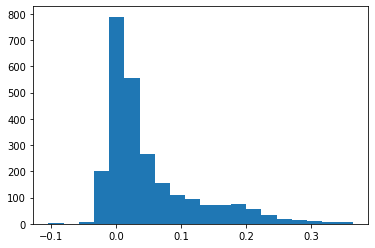

In [51]:
plt.hist(ridge_predict, bins=20)
plt.show()

In [55]:
# choose threshold of 0.05
predictions = regression_output_converter(ridge_predict, threshold=0.05)

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      2428
           1       0.12      0.80      0.21       127

    accuracy                           0.71      2555
   macro avg       0.55      0.75      0.52      2555
weighted avg       0.94      0.71      0.79      2555



Text(0.5, 1.0, 'Confusion Matrix for Ridge Regression Prediction')

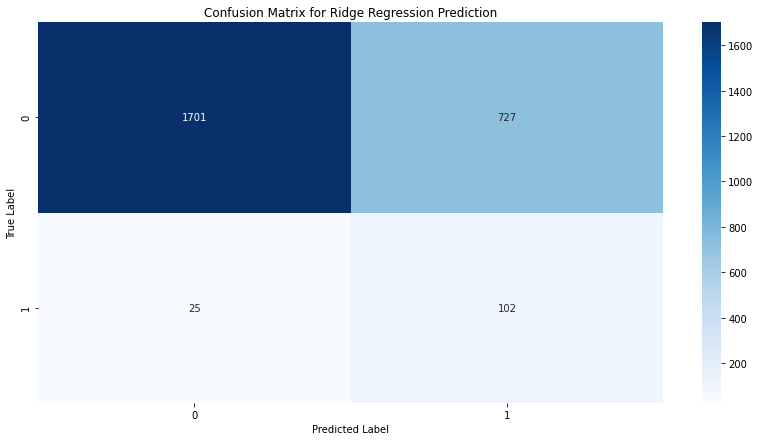

In [57]:
ridge_conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(14,7))
sns.heatmap(ridge_conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Ridge Regression Prediction")

# Lasso Regression

In [58]:
from sklearn.linear_model import Lasso

In [61]:
model = Lasso(max_iter=5000)

param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100], 
              "selection": ['cyclic', 'random'], 
             }

# grid = RandomizedSearchCV(model, param_grid, scoring='neg_mean_squared_log_error' , cv=10)
grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_log_error' , cv=10)

In [64]:
# %%time
# grid.fit(X_train, y_train)

In [63]:
# grid.best_params_

{'alpha': 0.0001, 'selection': 'cyclic'}

**Best parameters:** {'alpha': 0.0001, 'selection': 'cyclic'}

In [69]:
lasso_model = Lasso(alpha=0.0001, selection="cyclic")

lasso_model.fit(X_train, y_train)

lasso_predict = lasso_model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.02019289906116, tolerance: 0.011617455968688867
  positive)


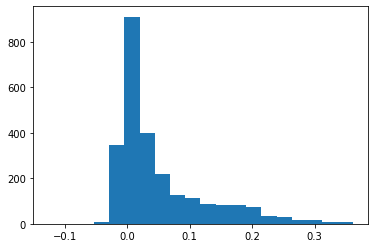

In [70]:
plt.hist(lasso_predict, bins=20)
plt.show()

In [71]:
# choose threshold of 0.05
predictions = regression_output_converter(lasso_predict, threshold=0.05)

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      2428
           1       0.12      0.80      0.21       127

    accuracy                           0.70      2555
   macro avg       0.55      0.75      0.51      2555
weighted avg       0.94      0.70      0.79      2555



Text(0.5, 1.0, 'Confusion Matrix for Lasso Regression Prediction')

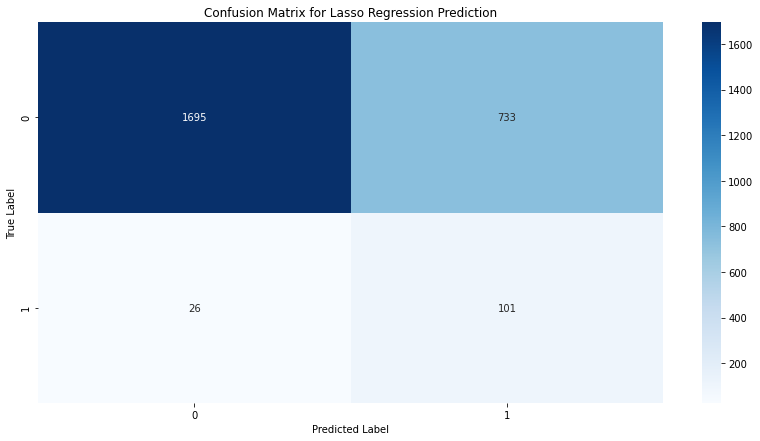

In [73]:
lasso_conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(14,7))
sns.heatmap(lasso_conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Lasso Regression Prediction")

# ElasticNet Regression

In [74]:
from sklearn.linear_model import ElasticNet

##### Hyperparameter Optimisation

In [75]:
model = ElasticNet(max_iter=5000)

param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
              "l1_ratio": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              "selection": ['cyclic', 'random'], 
             }

# grid = RandomizedSearchCV(model, param_grid, scoring='neg_mean_squared_log_error' , cv=10)
grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_log_error' , cv=10)

In [78]:
# %%time
# grid.fit(X_train, y_train)

In [77]:
# grid.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.1, 'selection': 'cyclic'}

**Best parameters:** {'alpha': 0.0001, 'l1_ratio': 0.1, 'selection': 'cyclic'}

In [79]:
elastic_model = ElasticNet(alpha=0.0001, l1_ratio=0.1, selection="cyclic")

elastic_model.fit(X_train, y_train)

elastic_predict = elastic_model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.993770714946756, tolerance: 0.011617455968688867
  positive)


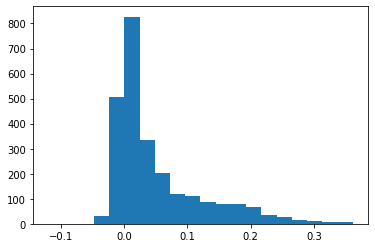

In [80]:
plt.hist(elastic_predict, bins=20)
plt.show()

In [81]:
# choose threshold of 0.05
predictions = regression_output_converter(elastic_predict, threshold=0.05)

In [82]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      2428
           1       0.12      0.80      0.21       127

    accuracy                           0.70      2555
   macro avg       0.55      0.75      0.51      2555
weighted avg       0.94      0.70      0.79      2555



Text(0.5, 1.0, 'Confusion Matrix for ElasticNet Regression Prediction')

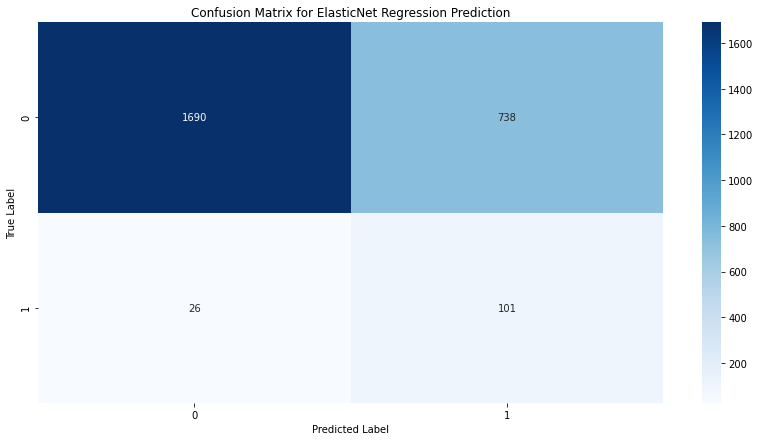

In [83]:
elastic_conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(14,7))
sns.heatmap(elastic_conf_matrix, annot=True, fmt='g', cbar=True, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for ElasticNet Regression Prediction")

# End of Modelling

As we can see, using regression models where we can adjust the threshold works much better for this dataset. This is most likely due to the imbalanced nature of the dataset.